<a href="https://colab.research.google.com/github/proinvestigadores/Smart/blob/main/Smart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Carga y auditoría de datos**

## **1.1. Setup y carga de datos**

In [6]:
# ---- 0) Configuración básica de entorno
import sys, os, re, math, json, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ajusta pandas para ver más columnas en prints
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 200)

# ---- 1) Montar Google Drive y definir ruta del CSV
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Importar
folder_path = '/content/drive/MyDrive/Pigs/Smart_Manufacturing/Modelos/'
file_path = 'Bd_Procesada_Junio_2024.csv'
path = folder_path + file_path
df = pd.read_csv(path)
df.head()

Mounted at /content/drive


,Timestamp,MD1_RPM,MD2_RPM,MD3_RPM,MD4_RPM,MD5_RPM,MD1_P,MD2_P,MD3_P,MD4_P,MD5_P,MD1_APM,MD2_APM,MD3_APM,MD4_APM,MD5_APM,MD1_PORCENT,MD2_PORCENT,MD3_PORCENT,MD4_PORCENT,MD5_PORCENT,MD1_ZE_VP,MD2_ZE_VP,MD3_ZE_VP,MD4_ZE_VP,MD5_ZE_VP,MD1_FND,MD2_FND,MD3_FND,MD4_FND,MD5_FND,CBZ_Z1_SP,CBZ_Z1_VP,CBZ_Z2_SP,CBZ_Z2_VP,CBZ_Z3_SP,CBZ_Z3_VP,CBZ_Z4_SP,CBZ_Z4_VP,CBZ_Z5_SP,CBZ_Z5_VP,CBZ_Z6_SP,CBZ_Z6_VP,HAL1_VEL,HAL2_VEL,HAL3_VEL,HAL4_VEL,HAL5_VEL,HAL6_VEL
0,2024-03-19 16:30:11,20.0,3.0,3.0,3.0,10.0,4678.0,1322.0,245.0,805.0,945.0,12.100,12.495,1.7,1.7,18.380,0.88,1.32,1.32,1.39,1.23,35.8,31.5,34.9,34.0,34.2,273.1,258.1,269.6,263.9,270.4,249.0,251.4,249.0,249.0,250.0,249.7,250.0,253.6,251.0,250.8,251.0,251.0,40.4,42.2,34.0,94.5,95.3,73.0
1,2024-03-19 16:30:59,20.0,3.0,3.0,3.0,10.0,4678.0,1322.0,245.0,805.0,945.0,12.100,12.495,1.7,1.7,18.380,0.88,1.32,1.32,1.39,1.23,35.8,31.5,34.9,34.0,34.2,273.1,258.1,269.6,263.9,270.4,249.0,251.4,249.0,249.0,250.0,249.7,250.0,253.6,251.0,250.8,251.0,251.0,40.4,42.2,34.0,94.5,95.3,73.0
2,2024-03-19 16:31:58,10.0,3.0,3.0,3.0,10.0,3880.0,1250.0,225.0,795.0,928.0,11.570,12.530,1.7,1.7,18.365,0.88,1.32,1.32,1.39,1.23,35.2,31.5,34.6,34.0,34.6,273.9,255.0,271.8,264.5,269.4,249.0,251.9,249.0,249.0,250.0,249.7,250.0,253.8,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0
3,2024-03-19 16:32:58,10.0,3.0,3.0,3.0,5.0,2928.0,1160.0,180.0,762.0,728.0,10.985,12.485,1.7,1.7,17.300,0.88,1.32,1.32,1.39,1.23,35.7,31.5,34.4,34.0,34.7,276.6,251.9,270.0,267.5,268.4,249.0,252.3,249.0,249.0,250.0,249.8,250.0,253.7,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0
4,2024-03-19 16:33:58,10.0,3.0,3.0,3.0,5.0,2770.0,1137.0,158.0,735.0,548.0,10.960,12.420,1.7,1.7,16.125,0.88,1.32,1.32,1.39,1.23,35.8,31.4,34.4,34.0,34.2,279.4,249.0,266.8,270.5,267.5,249.0,252.4,249.0,249.2,250.0,250.0,250.0,253.4,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0


## **1.2. Funciones de auditoría de datos**

In [7]:
# =========================================
# BLOQUE 1 — SETUP + CARGA + AUDITORÍA
# Objetivo 3: Validación del modelo (paso 1)
# =========================================

def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Estandariza nombres de columnas:
    - elimina espacios al inicio/fin
    - colapsa múltiples espacios internos
    - reemplaza espacios por '_'
    - asegura ASCII simple si hubiera tildes
    """
    def fix_col(c):
        # quita espacios externos
        c = c.strip()
        # colapsa espacios intermedios
        c = re.sub(r'\s+', ' ', c)
        # reemplaza espacios por underscore
        c = c.replace(' ', '_')
        # normaliza prefijos comunes tipo 'MD1' etc. sin tocar mayúsculas útiles
        return c
    df = df.rename(columns={c: fix_col(c) for c in df.columns})
    return df


def parse_timestamp(df: pd.DataFrame, ts_col_candidates=('Timestamp','timestamp','TIMESTAMP')) -> pd.DataFrame:
    """
    Busca la columna de tiempo, la parsea a datetime y ordena por tiempo.
    """
    ts_col = None
    for c in ts_col_candidates:
        if c in df.columns:
            ts_col = c
            break
    if ts_col is None:
        raise ValueError(f"No encontré columna de tiempo. Probé {ts_col_candidates} y no existen en df.columns={df.columns.tolist()[:10]}...")

    # Parse robusto (maneja 'YYYY-MM-DD HH:MM:SS' y variantes)
    df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
    if df[ts_col].isna().any():
        # Si hay fallos de parseo, explícitalos
        bad = df[df[ts_col].isna()]
        print("⚠️ Filas con Timestamp inválido:", len(bad))
        print(bad.head(3))
        # Puedes decidir aquí si las eliminas
        df = df.dropna(subset=[ts_col])

    df = df.sort_values(ts_col).reset_index(drop=True)
    return df, ts_col


def build_variable_families(columns):
    """
    Detecta familias de variables según prefijos/sufijos habituales del proceso:
    - RPM de módulos: MD*_RPM
    - Presiones: MD*_P (PSI)
    - % capa: MD*_PORCENT
    - Temperatura de fundido: MD*_FND
    - Temperaturas de cabezal: CBZ_Z{1..6}_SP y CBZ_Z{1..6}_VP
    - Velocidad haladores: HAL{1..6}_VEL
    Devuelve un dict con listas de columnas por familia.
    """
    fam = {
        "rpm_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_RPM", c)]),
        "presion_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_P", c)]),
        "porcentaje_capa": sorted([c for c in columns if re.fullmatch(r"MD\d+_PORCENT", c)]),
        "fundido_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_FND", c)]),
        "cabezal_SP": sorted([c for c in columns if re.fullmatch(r"CBZ_Z\d+_SP", c)]),
        "cabezal_VP": sorted([c for c in columns if re.fullmatch(r"CBZ_Z\d+_VP", c)]),
        "haladores_vel": sorted([c for c in columns if re.fullmatch(r"HAL\d+_VEL", c)]),
    }
    # Extras comunes en tu BD (si existen):
    extras = sorted([c for c in columns if c not in sum(fam.values(), []) and c not in ("Timestamp","timestamp","TIMESTAMP")])
    fam["extras"] = extras
    return fam


def time_gap_audit(ts: pd.Series) -> pd.DataFrame:
    """
    Calcula deltas consecutivos y los clasifica en bins relevantes para este proceso:
     - < 30s
     - 30s–59s
     - 59s–61s (ideal ≈ 60s)
     - 61s–120s
     - 2–5 min
     - 5–10 min
     - >10 min
    Devuelve tabla con conteos y %.
    """
    # diferencias en segundos
    dt = ts.sort_values().diff().dt.total_seconds().iloc[1:]  # omite la primera (NaN)
    bins = [-np.inf, 30, 59, 61, 120, 300, 600, np.inf]
    labels = ["<30s", "30–59s", "59–61s", "61–120s", "2–5min", "5–10min", ">10min"]
    cat = pd.cut(dt, bins=bins, labels=labels)
    counts = cat.value_counts().reindex(labels, fill_value=0)
    out = pd.DataFrame({
        "rango": counts.index,
        "conteo": counts.values,
        "porcentaje": np.round(100*counts.values / counts.sum(), 2)
    })
    out.loc["TOTAL"] = ["—", int(counts.sum()), 100.00]
    return out

# Carga del CSV
assert os.path.exists(path), f"No encuentro el CSV en: {path}"
df = pd.read_csv(path)

print("Forma (filas, columnas) antes de estandarizar:", df.shape)
df = standardize_columns(df)
df, TS_COL = parse_timestamp(df)

print("Columna de tiempo detectada:", TS_COL)
print("Rango temporal:", df[TS_COL].min(), "→", df[TS_COL].max())
print("Forma (filas, columnas) tras parseo/orden:", df.shape)
print("\nPrimeras filas:")
display(df.head(5))

# Diccionario de variables por familia
familias = build_variable_families(df.columns)
print("\nResumen de familias detectadas:")
for k, v in familias.items():
    print(f" - {k}: {len(v)} columnas")
    if len(v) > 0:
        print("   ", v)

# Auditoría de gaps temporales
gap_table = time_gap_audit(df[TS_COL])
print("\n=== Auditoría de gaps entre muestras ===")
display(gap_table)

# Chequeos rápidos de calidad de datos
# a) Porcentaje de valores nulos por columna (útil para decidir interpolaciones posteriores)
nulls = df.isna().mean().sort_values(ascending=False)
print("\nTop 10 columnas con mayor % de NaN:")
display((nulls*100).round(2).head(10).to_frame("%_NaN").T)

# b) Duplicados exactos por Timestamp (según milisegundo).
#    En el proceso, lo ideal es consolidar a muestreo por minuto en un bloque posterior.
dup_count = df.duplicated(subset=[TS_COL]).sum()
print(f"\nDuplicados exactos de {TS_COL}: {dup_count}")

# c) Vista de estadísticos básicos para familias principales (sirve para detectar sensores fuera de rango):
def describe_family(cols, titulo):
    if len(cols) == 0:
        print(f"\n[{titulo}] No se encontraron columnas.")
        return
    print(f"\n[{titulo}] Estadísticos rápidos")
    display(df[cols].describe().T)

describe_family(familias["rpm_modulos"], "RPM de módulos")
describe_family(familias["presion_modulos"], "Presión de módulos (PSI)")
describe_family(familias["fundido_modulos"], "Temperatura de fundido (°C)")
describe_family(familias["cabezal_SP"], "Cabezal SP (°C)")
describe_family(familias["cabezal_VP"], "Cabezal VP (°C)")
describe_family(familias["haladores_vel"], "Velocidad haladores (m/min aprox.)")

print("\n✅ BLOQUE 1 completado. Sube estas salidas al repo para continuar con el Bloque 2.")


Forma (filas, columnas) antes de estandarizar: (20260, 49)
Columna de tiempo detectada: Timestamp
Rango temporal: 2024-03-19 16:30:11 → 2024-04-02 16:50:06
Forma (filas, columnas) tras parseo/orden: (20260, 49)

Primeras filas:


,Timestamp,MD1_RPM,MD2_RPM,MD3_RPM,MD4_RPM,MD5_RPM,MD1_P,MD2_P,MD3_P,MD4_P,MD5_P,MD1_APM,MD2_APM,MD3_APM,MD4_APM,MD5_APM,MD1_PORCENT,MD2_PORCENT,MD3_PORCENT,MD4_PORCENT,MD5_PORCENT,MD1_ZE_VP,MD2_ZE_VP,MD3_ZE_VP,MD4_ZE_VP,MD5_ZE_VP,MD1_FND,MD2_FND,MD3_FND,MD4_FND,MD5_FND,CBZ_Z1_SP,CBZ_Z1_VP,CBZ_Z2_SP,CBZ_Z2_VP,CBZ_Z3_SP,CBZ_Z3_VP,CBZ_Z4_SP,CBZ_Z4_VP,CBZ_Z5_SP,CBZ_Z5_VP,CBZ_Z6_SP,CBZ_Z6_VP,HAL1_VEL,HAL2_VEL,HAL3_VEL,HAL4_VEL,HAL5_VEL,HAL6_VEL
0,2024-03-19 16:30:11,20.0,3.0,3.0,3.0,10.0,4678.0,1322.0,245.0,805.0,945.0,12.100,12.495,1.7,1.7,18.380,0.88,1.32,1.32,1.39,1.23,35.8,31.5,34.9,34.0,34.2,273.1,258.1,269.6,263.9,270.4,249.0,251.4,249.0,249.0,250.0,249.7,250.0,253.6,251.0,250.8,251.0,251.0,40.4,42.2,34.0,94.5,95.3,73.0
1,2024-03-19 16:30:59,20.0,3.0,3.0,3.0,10.0,4678.0,1322.0,245.0,805.0,945.0,12.100,12.495,1.7,1.7,18.380,0.88,1.32,1.32,1.39,1.23,35.8,31.5,34.9,34.0,34.2,273.1,258.1,269.6,263.9,270.4,249.0,251.4,249.0,249.0,250.0,249.7,250.0,253.6,251.0,250.8,251.0,251.0,40.4,42.2,34.0,94.5,95.3,73.0
2,2024-03-19 16:31:58,10.0,3.0,3.0,3.0,10.0,3880.0,1250.0,225.0,795.0,928.0,11.570,12.530,1.7,1.7,18.365,0.88,1.32,1.32,1.39,1.23,35.2,31.5,34.6,34.0,34.6,273.9,255.0,271.8,264.5,269.4,249.0,251.9,249.0,249.0,250.0,249.7,250.0,253.8,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0
3,2024-03-19 16:32:58,10.0,3.0,3.0,3.0,5.0,2928.0,1160.0,180.0,762.0,728.0,10.985,12.485,1.7,1.7,17.300,0.88,1.32,1.32,1.39,1.23,35.7,31.5,34.4,34.0,34.7,276.6,251.9,270.0,267.5,268.4,249.0,252.3,249.0,249.0,250.0,249.8,250.0,253.7,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0
4,2024-03-19 16:33:58,10.0,3.0,3.0,3.0,5.0,2770.0,1137.0,158.0,735.0,548.0,10.960,12.420,1.7,1.7,16.125,0.88,1.32,1.32,1.39,1.23,35.8,31.4,34.4,34.0,34.2,279.4,249.0,266.8,270.5,267.5,249.0,252.4,249.0,249.2,250.0,250.0,250.0,253.4,251.0,250.8,251.0,250.9,40.4,42.2,34.0,94.5,95.3,73.0



Resumen de familias detectadas:
 - rpm_modulos: 5 columnas
    ['MD1_RPM', 'MD2_RPM', 'MD3_RPM', 'MD4_RPM', 'MD5_RPM']
 - presion_modulos: 5 columnas
    ['MD1_P', 'MD2_P', 'MD3_P', 'MD4_P', 'MD5_P']
 - porcentaje_capa: 5 columnas
    ['MD1_PORCENT', 'MD2_PORCENT', 'MD3_PORCENT', 'MD4_PORCENT', 'MD5_PORCENT']
 - fundido_modulos: 5 columnas
    ['MD1_FND', 'MD2_FND', 'MD3_FND', 'MD4_FND', 'MD5_FND']
 - cabezal_SP: 6 columnas
    ['CBZ_Z1_SP', 'CBZ_Z2_SP', 'CBZ_Z3_SP', 'CBZ_Z4_SP', 'CBZ_Z5_SP', 'CBZ_Z6_SP']
 - cabezal_VP: 6 columnas
    ['CBZ_Z1_VP', 'CBZ_Z2_VP', 'CBZ_Z3_VP', 'CBZ_Z4_VP', 'CBZ_Z5_VP', 'CBZ_Z6_VP']
 - haladores_vel: 6 columnas
    ['HAL1_VEL', 'HAL2_VEL', 'HAL3_VEL', 'HAL4_VEL', 'HAL5_VEL', 'HAL6_VEL']
 - extras: 10 columnas
    ['MD1_APM', 'MD1_ZE_VP', 'MD2_APM', 'MD2_ZE_VP', 'MD3_APM', 'MD3_ZE_VP', 'MD4_APM', 'MD4_ZE_VP', 'MD5_APM', 'MD5_ZE_VP']

=== Auditoría de gaps entre muestras ===


,rango,conteo,porcentaje
0,<30s,221,1.09
1,30–59s,3238,15.98
2,59–61s,14279,70.48
3,61–120s,2512,12.40
4,2–5min,9,0.04
5,5–10min,0,0.00
6,>10min,0,0.00
TOTAL,—,20259,100.00



Top 10 columnas con mayor % de NaN:


,Timestamp,MD1_RPM,MD2_RPM,MD3_RPM,MD4_RPM,MD5_RPM,MD1_P,MD2_P,MD3_P,MD4_P
%_NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Duplicados exactos de Timestamp: 0

[RPM de módulos] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
MD1_RPM,20260.0,20.783514,4.293668,0.0,19.0,20.0,24.0,29.0
MD2_RPM,20260.0,29.331836,5.877503,0.0,27.0,28.0,34.0,41.0
MD3_RPM,20260.0,29.438746,6.656823,0.0,26.0,28.0,35.0,40.0
MD4_RPM,20260.0,28.797976,5.705796,0.0,27.0,28.0,33.0,42.0
MD5_RPM,20260.0,27.740918,6.216113,0.0,25.0,27.0,32.0,39.0



[Presión de módulos (PSI)] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
MD1_P,20260.0,5419.976604,979.700338,0.0,4910.0,5535.0,6260.0,6670.0
MD2_P,20260.0,4492.623149,708.378817,107.0,4243.0,4473.0,5006.0,6151.0
MD3_P,20260.0,2489.372261,521.701015,0.0,2260.0,2539.0,2860.0,3630.0
MD4_P,20260.0,3203.667769,505.179208,60.0,3030.0,3188.0,3550.0,4500.0
MD5_P,20260.0,2502.094077,499.223312,0.0,2225.0,2565.0,2890.0,3560.0



[Temperatura de fundido (°C)] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
MD1_FND,20260.0,279.273973,3.101996,271.7,276.8,279.2,281.7,287.0
MD2_FND,20260.0,253.800212,4.905635,243.4,249.6,254.2,258.0,264.3
MD3_FND,20260.0,263.867542,4.830683,253.9,259.6,264.0,268.2,273.1
MD4_FND,20260.0,267.137483,2.826345,260.8,264.6,267.2,269.6,276.2
MD5_FND,20260.0,265.205943,1.511194,259.9,264.1,265.2,266.1,277.1



[Cabezal SP (°C)] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
CBZ_Z1_SP,20260.0,248.733440,0.442157,248.0,248.0,249.0,249.0,249.0
CBZ_Z2_SP,20260.0,248.733440,0.442157,248.0,248.0,249.0,249.0,249.0
CBZ_Z3_SP,20260.0,248.010217,0.142414,248.0,248.0,248.0,248.0,250.0
CBZ_Z4_SP,20260.0,248.010217,0.142414,248.0,248.0,248.0,248.0,250.0
CBZ_Z5_SP,20260.0,248.015326,0.213620,248.0,248.0,248.0,248.0,251.0
CBZ_Z6_SP,20260.0,248.015326,0.213620,248.0,248.0,248.0,248.0,251.0



[Cabezal VP (°C)] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
CBZ_Z1_VP,20260.0,251.367270,0.766144,249.6,250.8,251.3,252.0,252.8
CBZ_Z2_VP,20260.0,248.725030,0.484118,244.6,248.3,249.0,249.0,249.9
CBZ_Z3_VP,20260.0,247.860464,0.757689,246.1,247.3,247.9,248.4,250.5
CBZ_Z4_VP,20260.0,251.406703,0.360667,250.7,251.1,251.4,251.7,253.9
CBZ_Z5_VP,20260.0,248.011841,0.251156,245.1,248.0,248.0,248.0,251.4
CBZ_Z6_VP,20260.0,248.012315,0.294222,243.8,247.9,248.0,248.1,252.5



[Velocidad haladores (m/min aprox.)] Estadísticos rápidos


,count,mean,std,min,25%,50%,75%,max
HAL1_VEL,20260.0,40.004980,1.046879,35.2,39.8,40.1,40.8,41.1
HAL2_VEL,20260.0,41.762665,1.092682,36.5,41.6,41.9,42.5,42.7
HAL3_VEL,20260.0,34.000000,0.000000,34.0,34.0,34.0,34.0,34.0
HAL4_VEL,20260.0,89.457295,2.645648,77.4,89.1,89.7,91.0,94.5
HAL5_VEL,20260.0,94.284970,2.450095,83.2,94.0,94.1,96.0,97.0
HAL6_VEL,20260.0,73.277853,1.930675,64.5,73.0,73.5,74.7,75.2



✅ BLOQUE 1 completado. Sube estas salidas al repo para continuar con el Bloque 2.


# **2. Filtro de outliers y etiquetado de estados**

## **2.1. Normalización temporal + filtro de outliers**

In [8]:
from IPython.display import display

# --- Validaciones mínimas ---
if 'df' not in globals() or 'TS_COL' not in globals():
    raise RuntimeError("No encuentro 'df' o 'TS_COL'. Ejecutar antes el Bloque 1.")

# --- Utilidades (definidas aquí para evitar dependencias del orden de celdas) ---
def build_variable_families(columns):
    import re
    fam = {
        "rpm_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_RPM", c)]),
        "presion_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_P", c)]),
        "porcentaje_capa": sorted([c for c in columns if re.fullmatch(r"MD\d+_PORCENT", c)]),
        "fundido_modulos": sorted([c for c in columns if re.fullmatch(r"MD\d+_FND", c)]),
        "cabezal_SP": sorted([c for c in columns if re.fullmatch(r"CBZ_Z\d+_SP", c)]),
        "cabezal_VP": sorted([c for c in columns if re.fullmatch(r"CBZ_Z\d+_VP", c)]),
        "haladores_vel": sorted([c for c in columns if re.fullmatch(r"HAL\d+_VEL", c)]),
    }
    extras = sorted([c for c in columns if c not in sum(fam.values(), []) and c not in (TS_COL,)])
    fam["extras"] = extras
    return fam

def cap_outliers_df(df_num: pd.DataFrame, iqr_k: float = 3.0, p_low: float = 0.001, p_high: float = 0.999):
    """
    Aplica capping columna a columna usando dos criterios:
    - Regla de Tukey extendida: [Q1 - k*IQR, Q3 + k*IQR]
    - Percentiles (p_low, p_high) para robustecer límites
    Devuelve (df_capped, reporte_df) sin modificar el df de entrada.
    """
    capped = df_num.copy()
    rows = []
    for col in df_num.columns:
        s = df_num[col]
        if not np.issubdtype(s.dtype, np.number):
            continue
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        if np.isfinite(iqr) and iqr > 0:
            low_iqr = q1 - iqr_k * iqr
            high_iqr = q3 + iqr_k * iqr
        else:
            # Si la columna es casi constante, usa solo percentiles
            low_iqr = s.min()
            high_iqr = s.max()
        low_p = s.quantile(p_low)
        high_p = s.quantile(p_high)
        low_cap = max(low_iqr, low_p)
        high_cap = min(high_iqr, high_p)

        s_clipped = s.clip(lower=low_cap, upper=high_cap)
        changed = (s_clipped != s) & s.notna()
        capped[col] = s_clipped

        rows.append({
            "columna": col,
            "n_total": int(s.notna().sum()),
            "capados": int(changed.sum()),
            "min_original": float(np.nanmin(s)),
            "p001": float(low_p),
            "Q1": float(q1),
            "Q3": float(q3),
            "p999": float(high_p),
            "max_original": float(np.nanmax(s)),
            "min_nuevo": float(np.nanmin(s_clipped)),
            "max_nuevo": float(np.nanmax(s_clipped))
        })
    report = pd.DataFrame(rows).sort_values("capados", ascending=False).reset_index(drop=True)
    return capped, report

# --- 1) Copia de trabajo y resampleo a 1 min ---
dfw = df.copy()
# Asegurar orden temporal por si acaso
dfw = dfw.sort_values(TS_COL).reset_index(drop=True)

# Selecciona solo numéricas para operaciones de promedio/interpolación
num_cols = dfw.select_dtypes(include='number').columns.tolist()

# Index temporal (DatetimeIndex) para resample; no se modifica df original
df_num = dfw.set_index(TS_COL)[num_cols]

# Resampleo a 1 min con promedio; mantiene únicamente columnas numéricas
df_num_1min = df_num.resample('1min').mean()

# Interpolación temporal (hasta 2 minutos seguidos de NaN).
# 'limit_direction="both"' rellena huecos al inicio/fin hasta el límite.
df_num_1min = df_num_1min.interpolate(method='time', limit=2, limit_direction='both')

print("Forma numérica tras resampleo a 1min:", df_num_1min.shape)

# --- 2) Capping de outliers (incluye el caso MD4_ZE_VP si existe) ---
df_capped, capping_report = cap_outliers_df(df_num_1min, iqr_k=3.0, p_low=0.001, p_high=0.999)

print("\n=== Bitácora de capping (top 10 por cantidad de valores capados) ===")
display(capping_report.head(10))

if "MD4_ZE_VP" in df_capped.columns:
    fila = capping_report[capping_report["columna"] == "MD4_ZE_VP"]
    if not fila.empty:
        print("\nResumen específico de MD4_ZE_VP:")
        display(fila)

# --- 3) Reconstrucción de df_1min (numérico limpio) y reporte rápido ---
df_1min = df_capped.copy()
df_1min.index.name = TS_COL  # etiqueta el índice para consistencia

print("\nEstadísticos rápidos post-capping (MD*_ZE_VP si existe):")
ze_cols = [c for c in df_1min.columns if c.endswith("_ZE_VP")]
if ze_cols:
    display(df_1min[ze_cols].describe().T)

# --- 4) Familias sobre el nuevo df_1min (para siguientes bloques) ---
familias_1min = build_variable_families(df_1min.columns)
print("\nFamilias detectadas en df_1min (numéricas):")
for k, v in familias_1min.items():
    if k != "extras":
        print(f" - {k}: {len(v)}")
print("Extras:", len(familias_1min["extras"]))

print("\n✅ BLOQUE 2A completado. Usar 'df_1min' para ingeniería de características y reglas de estado.")


Forma numérica tras resampleo a 1min: (20181, 48)

=== Bitácora de capping (top 10 por cantidad de valores capados) ===


,columna,n_total,capados,min_original,p001,Q1,Q3,p999,max_original,min_nuevo,max_nuevo
0,MD4_ZE_VP,20181,2295,33.7,33.80,33.90,34.00,106.194,6550.30,33.80,34.30
1,HAL4_VEL,20181,742,77.4,77.40,89.10,91.00,94.500,94.50,83.40,94.50
2,MD5_APM,20181,655,0.0,0.00,24.14,25.37,27.450,27.83,20.45,27.45
3,MD4_P,20181,564,60.0,70.63,3030.00,3550.00,4180.000,4500.00,1470.00,4180.00
4,MD2_P,20181,563,107.0,137.00,4244.00,5008.00,5650.280,6151.00,1952.00,5650.28
5,MD4_RPM,20181,543,0.0,0.00,27.00,33.00,41.000,42.00,9.00,41.00
6,MD4_APM,20181,542,0.0,0.00,15.90,19.40,24.100,24.70,5.40,24.10
7,MD2_RPM,20181,541,0.0,0.00,27.00,34.00,41.000,41.00,6.00,41.00
8,HAL5_VEL,20181,536,83.2,83.20,94.00,96.00,97.000,97.00,88.00,97.00
9,HAL2_VEL,20181,536,36.5,36.50,41.60,42.50,42.700,42.70,38.90,42.70



Resumen específico de MD4_ZE_VP:


,columna,n_total,capados,min_original,p001,Q1,Q3,p999,max_original,min_nuevo,max_nuevo
0,MD4_ZE_VP,20181,2295,33.7,33.8,33.9,34.0,106.194,6550.3,33.8,34.3



Estadísticos rápidos post-capping (MD*_ZE_VP si existe):


,count,mean,std,min,25%,50%,75%,max
MD1_ZE_VP,20181.0,35.627207,0.365160,35.00,35.3,35.600,35.900,37.364
MD2_ZE_VP,20181.0,31.957521,0.927722,29.65,31.3,31.750,32.800,36.582
MD3_ZE_VP,20181.0,34.758208,0.207461,34.30,34.6,34.775,34.900,35.800
MD4_ZE_VP,20181.0,34.002401,0.119312,33.80,33.9,34.000,34.000,34.300
MD5_ZE_VP,20181.0,34.515702,0.295526,34.00,34.3,34.500,34.725,35.382



Familias detectadas en df_1min (numéricas):
 - rpm_modulos: 5
 - presion_modulos: 5
 - porcentaje_capa: 5
 - fundido_modulos: 5
 - cabezal_SP: 6
 - cabezal_VP: 6
 - haladores_vel: 6
Extras: 10

✅ BLOQUE 2A completado. Usar 'df_1min' para ingeniería de características y reglas de estado.


## **2.2. Ventanas y reglas de estado**

1.   Este bloque parte desde *df_1min* (datetimelike a 1 min) y *familias_1min*.
2.   Construye _features_ por ventana de 5 minutos con métricas: nivel y variabilidad temporal de haladores, RPM, presión y desviación de cabezal.
3. Aprende umbrales automáticos a partir de cuantiles para distinguir: PARO, PRODUCCION, SETUP, DESPERDICIO.
4. Genera una línea de tiempo de estados y un reporte de conteos/porcentajes, más un diccionario con los umbrales utilizados (todo exportable a CSV/JSON).

=== Familias detectadas (para construir ventanas) ===
- Haladores (HAL*_VEL): 6 columnas
- RPM módulos (MD*_RPM): 5 columnas
- Presión módulos (MD*_P): 5 columnas
- Cabezal SP (CBZ_Z*_SP): 6 columnas
- Cabezal VP (CBZ_Z*_VP): 6 columnas

=== Rango temporal en df_1min ===
2024-03-19 16:30:00 → 2024-04-02 16:50:00
Total de filas (minutos): 20181

Ventana de visualización sugerida: 2024-03-19 16:30:00 → 2024-03-20 00:30:00 (~8 h)
(Edita PLOT_HOURS si quieres ver un tramo mayor.)


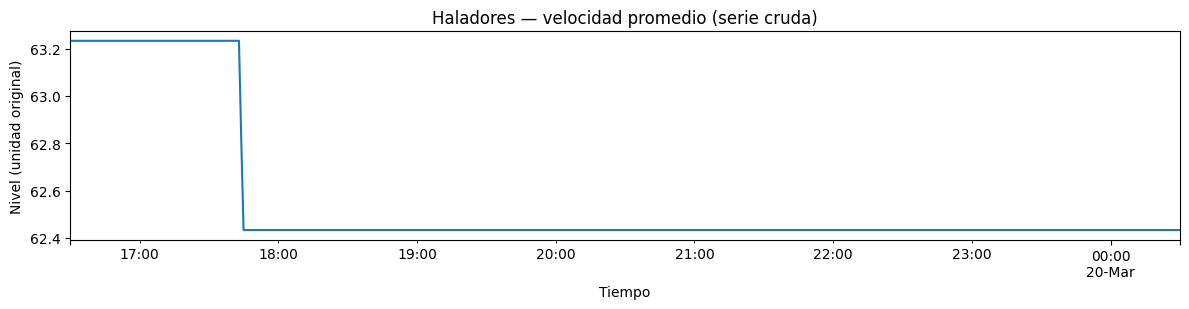

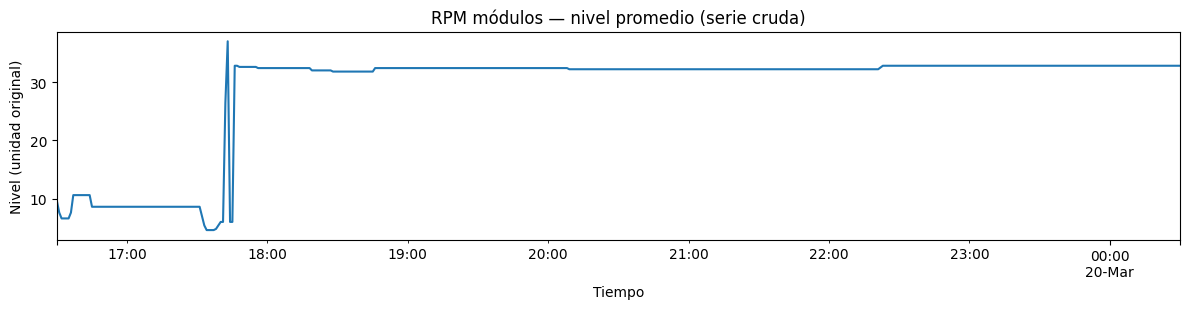

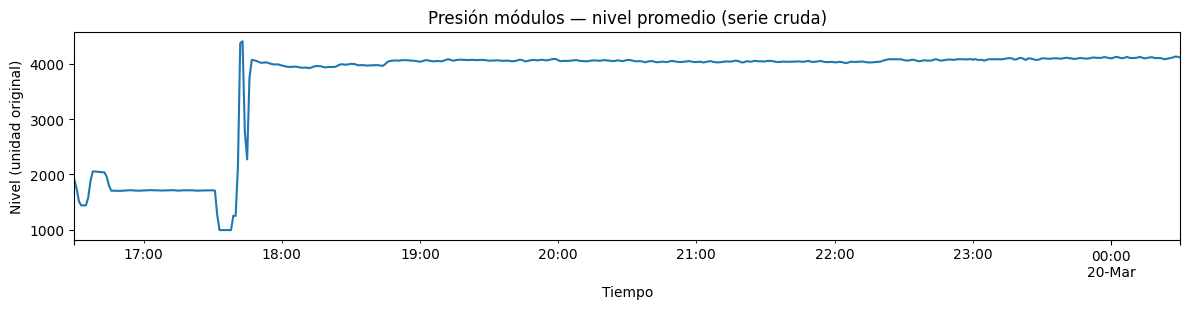

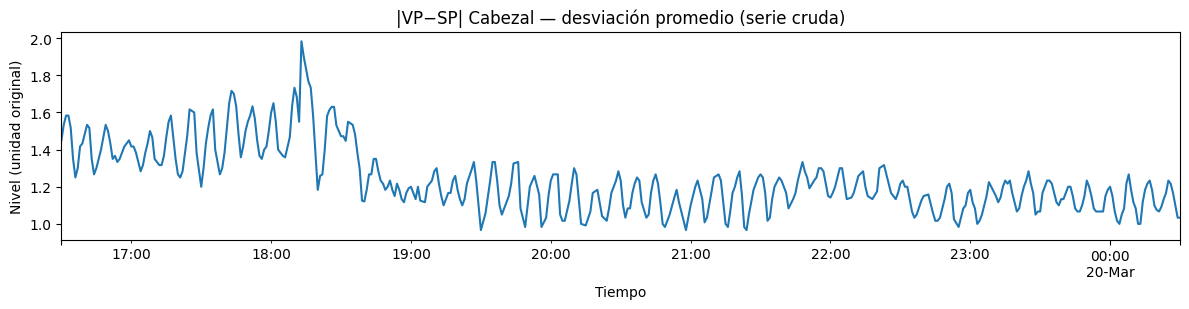


=== Vista de características (primeras 10 filas) ===


,hal_speed_mean_5m,hal_speed_std_5m,hal_pct_zero_5m,rpm_level_mean_5m,rpm_var_t_5m,rpm_absdiff_5m,pres_level_mean_5m,pres_var_t_5m,cbz_dev_mean_5m,cbz_dev_std_5m
Timestamp,,,,,,,,,,
2024-03-19 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-19 16:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-19 16:32:00,63.233333,0.0,0.0,7.933333,1.527525,NaN,1715.533333,197.659944,1.522222,0.067358
2024-03-19 16:33:00,63.233333,0.0,0.0,7.600000,1.414214,1.00,1646.650000,212.193206,1.537500,0.062915
2024-03-19 16:34:00,63.233333,0.0,0.0,7.400000,1.303840,0.75,1605.600000,205.414167,1.533333,0.055277
2024-03-19 16:35:00,63.233333,0.0,0.0,6.800000,0.447214,0.60,1514.080000,128.401760,1.513333,0.096032
2024-03-19 16:36:00,63.233333,0.0,0.0,6.800000,0.447214,0.40,1482.320000,61.247465,1.456667,0.149815
2024-03-19 16:37:00,63.233333,0.0,0.0,7.600000,1.732051,0.80,1557.840000,192.459003,1.400000,0.143372
2024-03-19 16:38:00,63.233333,0.0,0.0,8.400000,2.049390,0.80,1680.920000,276.630678,1.366667,0.104083



=== Umbrales utilizados (tabla) ===


,speed_active_thresh,speed_paro_thresh,rpm_var_lo_p25,rpm_var_hi_p75,hal_var_lo_p25,hal_var_hi_p75,cbz_dev_mid_p50,cbz_dev_hi_p75,pres_high_thresh,pct_zero_hi
0,60.383333,30.191667,0.0,0.0,0.0,0.0,1.143333,1.216667,3704.88,0.8


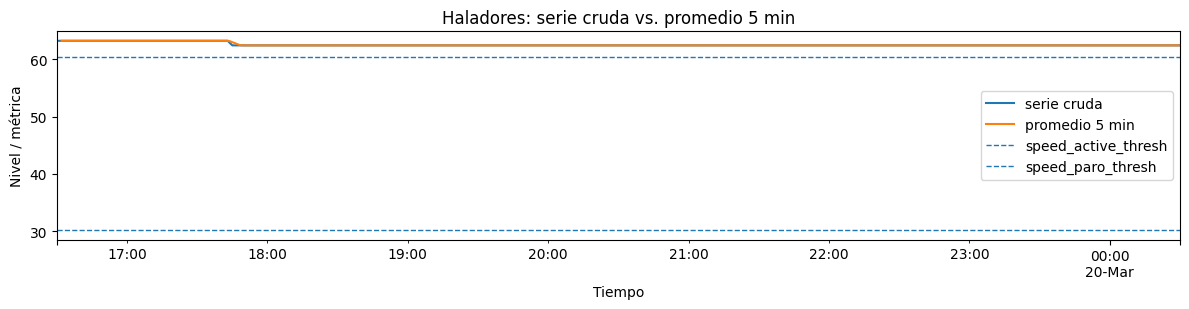

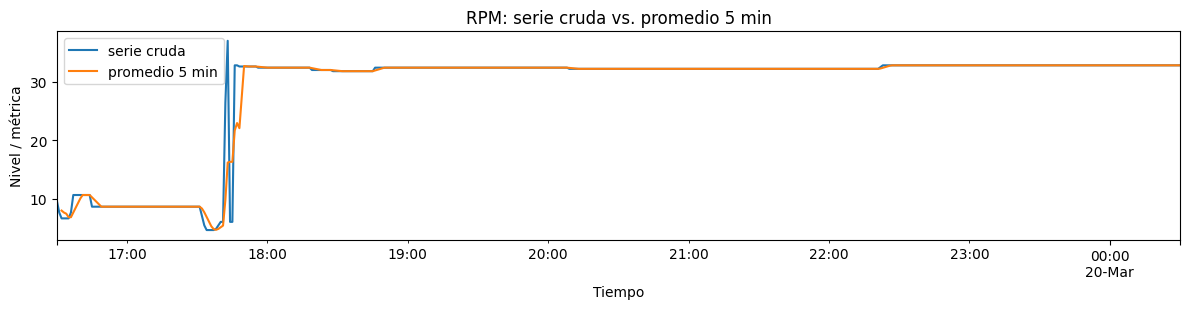

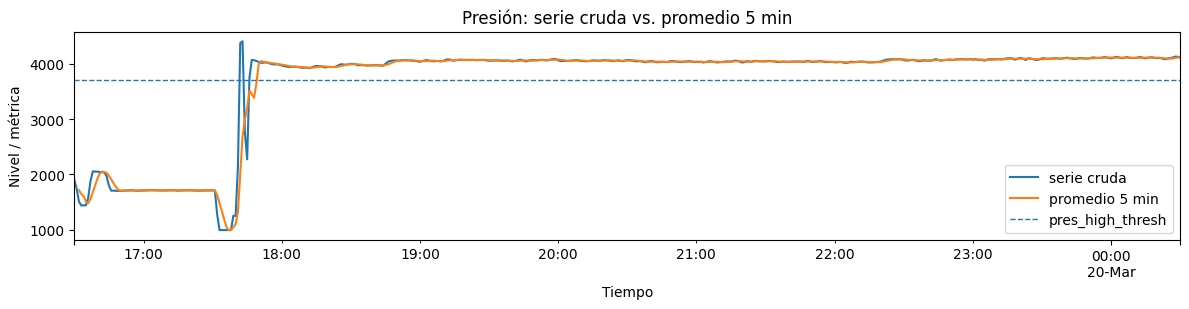

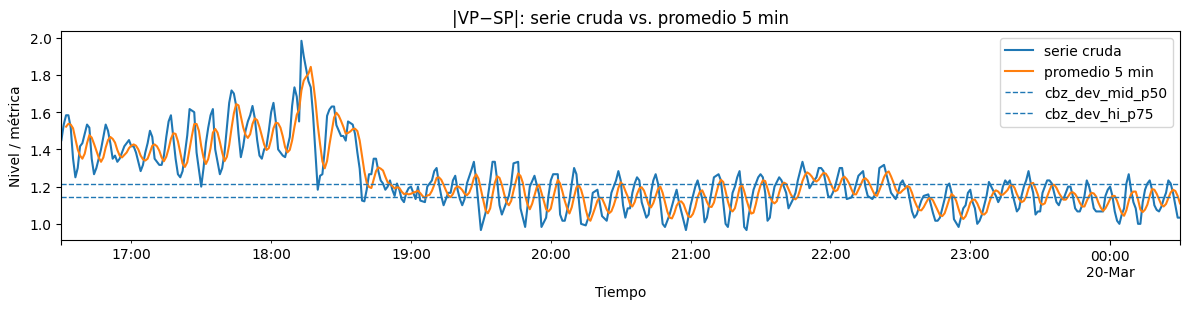


=== Conteo de flags por regla (antes de resolver solapamientos) ===


,conteo
is_paro,0
is_produccion,8716
is_desperdicio,3637



=== Timeline (muestra en la ventana de visualización) ===


,hal_speed_mean_5m,hal_speed_std_5m,hal_pct_zero_5m,rpm_level_mean_5m,rpm_var_t_5m,rpm_absdiff_5m,pres_level_mean_5m,pres_var_t_5m,cbz_dev_mean_5m,cbz_dev_std_5m,estado
Timestamp,,,,,,,,,,,
2024-03-19 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SETUP
2024-03-19 16:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SETUP
2024-03-19 16:32:00,63.233333,0.0,0.0,7.933333,1.527525,NaN,1715.533333,197.659944,1.522222,0.067358,SETUP
2024-03-19 16:33:00,63.233333,0.0,0.0,7.600000,1.414214,1.00,1646.650000,212.193206,1.537500,0.062915,SETUP
2024-03-19 16:34:00,63.233333,0.0,0.0,7.400000,1.303840,0.75,1605.600000,205.414167,1.533333,0.055277,SETUP
2024-03-19 16:35:00,63.233333,0.0,0.0,6.800000,0.447214,0.60,1514.080000,128.401760,1.513333,0.096032,SETUP
2024-03-19 16:36:00,63.233333,0.0,0.0,6.800000,0.447214,0.40,1482.320000,61.247465,1.456667,0.149815,SETUP
2024-03-19 16:37:00,63.233333,0.0,0.0,7.600000,1.732051,0.80,1557.840000,192.459003,1.400000,0.143372,SETUP
2024-03-19 16:38:00,63.233333,0.0,0.0,8.400000,2.049390,0.80,1680.920000,276.630678,1.366667,0.104083,SETUP



=== Distribución final de estados ===


,conteo,porcentaje
estado,,
PRODUCCION,8716,43.19
SETUP,7828,38.79
DESPERDICIO,3637,18.02



=== Matriz de transiciones (estado anterior → estado actual) ===


actual,DESPERDICIO,PRODUCCION,SETUP
anterior,,,
DESPERDICIO,3006,619,12
INICIO,0,0,1
PRODUCCION,615,7384,716
SETUP,16,713,7099



✅ BLOQUE completado.


In [11]:
# =========================================
# # Requisitos: df_1min (index temporal a 1 min), familias_1min y TS_COL (de Bloques 1 y 2A)
# =========================================
import matplotlib.pyplot as plt
from IPython.display import display

# ---------- 0) Validaciones de entorno ----------
if 'df_1min' not in globals():
    raise RuntimeError("No encuentro 'df_1min'. Ejecuta antes el Bloque 2A.")
if 'familias_1min' not in globals():
    raise RuntimeError("No encuentro 'familias_1min'. Ejecuta antes el Bloque 2A.")
if 'TS_COL' not in globals():
    raise RuntimeError("No encuentro 'TS_COL'. Ejecuta antes el Bloque 1.")

# ---------- 1) Familias de variables y series “crudas” clave ----------
HAL = familias_1min.get("haladores_vel", [])
RPM = familias_1min.get("rpm_modulos", [])
PRES = familias_1min.get("presion_modulos", [])
CBZ_SP = familias_1min.get("cabezal_SP", [])
CBZ_VP = familias_1min.get("cabezal_VP", [])

print("=== Familias detectadas (para construir ventanas) ===")
print(f"- Haladores (HAL*_VEL): {len(HAL)} columnas")
print(f"- RPM módulos (MD*_RPM): {len(RPM)} columnas")
print(f"- Presión módulos (MD*_P): {len(PRES)} columnas")
print(f"- Cabezal SP (CBZ_Z*_SP): {len(CBZ_SP)} columnas")
print(f"- Cabezal VP (CBZ_Z*_VP): {len(CBZ_VP)} columnas")

if not HAL:
    raise RuntimeError("No hay columnas de haladores (HAL*_VEL). Son necesarias para el etiquetado de estados.")

# Series crudas base (nivel por minuto)
def _safe_mean(df: pd.DataFrame, cols: list) -> pd.Series:
    cols = [c for c in cols if c in df.columns]
    if not cols:
        return pd.Series(index=df.index, dtype='float64')
    return df[cols].mean(axis=1)

hal_speed = _safe_mean(df_1min, HAL)                       # avance de línea
rpm_level = _safe_mean(df_1min, RPM) if RPM else pd.Series(index=df_1min.index, dtype='float64')
pres_level = _safe_mean(df_1min, PRES) if PRES else pd.Series(index=df_1min.index, dtype='float64')

# |VP - SP| promedio entre zonas del cabezal
if CBZ_SP and CBZ_VP:
    zones = []
    for sp in CBZ_SP:
        vp = sp.replace("_SP", "_VP")
        if vp in df_1min.columns:
            zones.append((vp, sp))
    if zones:
        cbz_dev = pd.concat([(df_1min[vp] - df_1min[sp]).abs() for (vp, sp) in zones], axis=1).mean(axis=1)
    else:
        cbz_dev = pd.Series(index=df_1min.index, dtype='float64')
else:
    cbz_dev = pd.Series(index=df_1min.index, dtype='float64')

# Rango temporal de trabajo
print("\n=== Rango temporal en df_1min ===")
print(df_1min.index.min(), "→", df_1min.index.max())
print(f"Total de filas (minutos): {len(df_1min)}")

# ---------- 2) Selección de una ventana de visualización (para gráficas) ----------
# Para no saturar, graficamos por defecto ~8 horas continuas desde el inicio.
PLOT_HOURS = 8
start_ts = df_1min.index.min()
end_ts = start_ts + pd.Timedelta(hours=PLOT_HOURS)
if end_ts > df_1min.index.max():
    end_ts = df_1min.index.max()
plot_slice = slice(start_ts, end_ts)
print(f"\nVentana de visualización sugerida: {start_ts} → {end_ts} (~{PLOT_HOURS} h)\n"
      f"(Edita PLOT_HOURS si quieres ver un tramo mayor.)")

# ---------- 3) Gráficas de series crudas (nivel) ----------
# Nota: se usa Matplotlib simple y una figura por gráfico (evita warnings/deprecaciones).
def _quick_plot(series: pd.Series, title: str):
    plt.figure(figsize=(12, 3.2))
    series.loc[plot_slice].plot()
    plt.title(title)
    plt.xlabel("Tiempo")
    plt.ylabel("Nivel (unidad original)")
    plt.tight_layout()
    plt.show()

_quick_plot(hal_speed, "Haladores — velocidad promedio (serie cruda)")
if not rpm_level.empty:
    _quick_plot(rpm_level, "RPM módulos — nivel promedio (serie cruda)")
if not pres_level.empty:
    _quick_plot(pres_level, "Presión módulos — nivel promedio (serie cruda)")
if not cbz_dev.empty:
    _quick_plot(cbz_dev, "|VP−SP| Cabezal — desviación promedio (serie cruda)")

# ---------- 4) Construcción de características en ventanas (5 min, paso 1 min) ----------
# Una "ventana" de 5 minutos suaviza y resume el comportamiento reciente para cada instante.
WINDOW = '5min'
MINP = 3  # se requieren al menos 3 datos dentro de la ventana

def _roll_mean(s): return s.rolling(window=WINDOW, min_periods=MINP).mean()
def _roll_std(s):  return s.rolling(window=WINDOW, min_periods=MINP).std()

# Variabilidad temporal agregada: |Δ| minuto a minuto promedio entre columnas
def _rolling_mean_absdiff(df: pd.DataFrame, cols: list) -> pd.Series:
    cols = [c for c in cols if c in df.columns]
    if not cols:
        return pd.Series(index=df.index, dtype='float64')
    absdiff = df[cols].diff().abs().mean(axis=1)
    return absdiff.rolling(window=WINDOW, min_periods=MINP).mean()

def _percent_zero_haladores(df: pd.DataFrame, hal_cols: list) -> pd.Series:
    hal_cols = [c for c in hal_cols if c in df.columns]
    zeros = df[hal_cols].eq(0).astype('float64')
    z_time = zeros.rolling(window=WINDOW, min_periods=MINP).mean()
    return z_time.mean(axis=1)  # promedio entre haladores

features = pd.DataFrame(index=df_1min.index)
features["hal_speed_mean_5m"] = _roll_mean(hal_speed)
features["hal_speed_std_5m"]  = _roll_std(hal_speed)
features["hal_pct_zero_5m"]   = _percent_zero_haladores(df_1min, HAL)

if not rpm_level.empty:
    features["rpm_level_mean_5m"] = _roll_mean(rpm_level)
    features["rpm_var_t_5m"]      = _roll_std(rpm_level)
    features["rpm_absdiff_5m"]    = _rolling_mean_absdiff(df_1min, RPM)

if not pres_level.empty:
    features["pres_level_mean_5m"] = _roll_mean(pres_level)
    features["pres_var_t_5m"]      = _roll_std(pres_level)

if not cbz_dev.empty:
    features["cbz_dev_mean_5m"] = _roll_mean(cbz_dev)
    features["cbz_dev_std_5m"]  = _roll_std(cbz_dev)

print("\n=== Vista de características (primeras 10 filas) ===")
display(features.head(10))

# ---------- 5) Umbrales automáticos (explicados) ----------
def _robust_q(s: pd.Series, q: float, fallback=np.nan):
    try:
        v = s.quantile(q)
        if pd.isna(v): return fallback
        return float(v)
    except Exception:
        return fallback

pos_hal = hal_speed[hal_speed > 0]
speed_active_thresh = _robust_q(pos_hal, 0.10, fallback=0.0)   # p10 de haladores > 0 → "línea activa"
speed_paro_thresh   = 0.5 * speed_active_thresh                # 50% de lo activo → "paro contundente"

rpm_var_hi = _robust_q(features["rpm_var_t_5m"].dropna(), 0.75, fallback=np.nan) if "rpm_var_t_5m" in features else np.nan
rpm_var_lo = _robust_q(features["rpm_var_t_5m"].dropna(), 0.25, fallback=np.nan) if "rpm_var_t_5m" in features else np.nan
hal_var_hi = _robust_q(features["hal_speed_std_5m"].dropna(), 0.75, fallback=np.nan)
hal_var_lo = _robust_q(features["hal_speed_std_5m"].dropna(), 0.25, fallback=np.nan)
dev_hi     = _robust_q(features["cbz_dev_mean_5m"].dropna(), 0.75, fallback=np.nan) if "cbz_dev_mean_5m" in features else np.nan
dev_mid    = _robust_q(features["cbz_dev_mean_5m"].dropna(), 0.50, fallback=np.nan) if "cbz_dev_mean_5m" in features else np.nan

if "pres_level_mean_5m" in features:
    pres_med     = _robust_q(features["pres_level_mean_5m"].dropna(), 0.50, fallback=np.nan)
    pres_high_th = np.nanmax([300.0, pres_med])
else:
    pres_high_th = np.nan

pct_zero_hi = 0.8  # 80% de ceros dentro de la ventana

thresholds_df = pd.DataFrame.from_dict({
    "speed_active_thresh": [speed_active_thresh],
    "speed_paro_thresh":   [speed_paro_thresh],
    "rpm_var_lo_p25":      [rpm_var_lo],
    "rpm_var_hi_p75":      [rpm_var_hi],
    "hal_var_lo_p25":      [hal_var_lo],
    "hal_var_hi_p75":      [hal_var_hi],
    "cbz_dev_mid_p50":     [dev_mid],
    "cbz_dev_hi_p75":      [dev_hi],
    "pres_high_thresh":    [pres_high_th],
    "pct_zero_hi":         [pct_zero_hi],
})
print("\n=== Umbrales utilizados (tabla) ===")
display(thresholds_df)

# ---------- 6) Gráficas intermedias con ventanas y umbrales ----------
def _plot_with_window_and_lines(raw_series, win_series, title, hlines: dict):
    plt.figure(figsize=(12, 3.2))
    raw_series.loc[plot_slice].plot(label="serie cruda")
    if win_series is not None:
        win_series.loc[plot_slice].plot(label="promedio 5 min")
    for name, y in (hlines or {}).items():
        if pd.notna(y):
            plt.axhline(y, linestyle="--", linewidth=1.0, label=name)
    plt.title(title)
    plt.xlabel("Tiempo"); plt.ylabel("Nivel / métrica")
    plt.legend()
    plt.tight_layout()
    plt.show()

_plot_with_window_and_lines(
    hal_speed, features["hal_speed_mean_5m"],
    "Haladores: serie cruda vs. promedio 5 min",
    {"speed_active_thresh": speed_active_thresh, "speed_paro_thresh": speed_paro_thresh}
)

if "rpm_level_mean_5m" in features:
    _plot_with_window_and_lines(
        rpm_level, features["rpm_level_mean_5m"],
        "RPM: serie cruda vs. promedio 5 min",
        {}
    )
if "pres_level_mean_5m" in features:
    _plot_with_window_and_lines(
        pres_level, features["pres_level_mean_5m"],
        "Presión: serie cruda vs. promedio 5 min",
        {"pres_high_thresh": pres_high_th}
    )
if "cbz_dev_mean_5m" in features:
    _plot_with_window_and_lines(
        cbz_dev, features["cbz_dev_mean_5m"],
        "|VP−SP|: serie cruda vs. promedio 5 min",
        {"cbz_dev_mid_p50": dev_mid, "cbz_dev_hi_p75": dev_hi}
    )

# ---------- 7) Reglas de estado (paso a paso) ----------
is_paro = (
    (features["hal_speed_mean_5m"] <= speed_paro_thresh) |
    (features["hal_pct_zero_5m"]   >= pct_zero_hi)
)

is_produccion = (
    (features["hal_speed_mean_5m"] >= speed_active_thresh) &
    ((pd.isna(rpm_var_lo) | (features.get("rpm_var_t_5m", pd.Series(index=features.index)) <= rpm_var_lo)) &
     (pd.isna(hal_var_lo) | (features["hal_speed_std_5m"] <= hal_var_lo)) &
     (pd.isna(dev_mid)    | (features.get("cbz_dev_mean_5m", pd.Series(index=features.index)) <= dev_mid))) &
    (pd.isna(pres_high_th) | (features.get("pres_level_mean_5m", pd.Series(index=features.index)) >= 0))
) & (~is_paro)

is_desperdicio = (
    (features["hal_speed_mean_5m"] >= speed_active_thresh) &
    (
        ((not pd.isna(rpm_var_hi)) & (features.get("rpm_var_t_5m", pd.Series(index=features.index)) >= rpm_var_hi)) |
        ((not pd.isna(hal_var_hi)) & (features["hal_speed_std_5m"] >= hal_var_hi)) |
        ((not pd.isna(dev_hi))     & (features.get("cbz_dev_mean_5m", pd.Series(index=features.index)) >= dev_hi))
    ) &
    (pd.isna(pres_high_th) | (features.get("pres_level_mean_5m", pd.Series(index=features.index)) >= pres_high_th))
) & (~is_paro) & (~is_produccion)

labels = pd.Series(index=features.index, dtype='object')
labels.loc[is_paro]       = "PARO"
labels.loc[is_produccion] = "PRODUCCION"
labels.loc[is_desperdicio]= "DESPERDICIO"
labels.fillna("SETUP", inplace=True)

# Conteo de flags (antes de resolución final)
flags_report = pd.DataFrame({
    "is_paro": is_paro.sum(),
    "is_produccion": is_produccion.sum(),
    "is_desperdicio": is_desperdicio.sum()
}, index=["conteo"]).T
print("\n=== Conteo de flags por regla (antes de resolver solapamientos) ===")
display(flags_report)

# ---------- 8) Timeline de estados y salidas finales ----------
timeline = features.copy()
timeline["estado"] = labels

# Muestra del timeline (tramo de visualización)
print("\n=== Timeline (muestra en la ventana de visualización) ===")
display(timeline.loc[plot_slice].head(15))

# Distribución final de estados
counts = timeline["estado"].value_counts(dropna=False).sort_values(ascending=False)
perc = (100 * counts / counts.sum()).round(2)
dist_estados = pd.DataFrame({"conteo": counts, "porcentaje": perc})
print("\n=== Distribución final de estados ===")
display(dist_estados)

# Transiciones entre estados (útil para entender dinámica)
trans = pd.crosstab(
    timeline["estado"].shift(1).fillna("INICIO"),
    timeline["estado"], rownames=["anterior"], colnames=["actual"]
)
print("\n=== Matriz de transiciones (estado anterior → estado actual) ===")
display(trans)

# ---------- 9) (Opcional) Persistencia de artefactos ----------
# dist_estados.to_csv("dist_estados.csv")
# timeline.to_csv("timeline_estados_5m.csv")                 # grande
# thresholds_df.to_csv("umbrales_utilizados.csv", index=False)
# flags_report.to_csv("flags_por_regla.csv")
print("\n✅ BLOQUE completado.")


# **3. Cálculo de disponibilidad, rendimiento y calidad**

## **3.1. Métricas por días y turnos**

=== Indicadores por DÍA (primeras filas) ===


,fecha,disponibilidad,rendimiento,buenos,activos,calidad,DESPERDICIO,PRODUCCION,SETUP
0,2024-03-19,1.0,0.986073,125.0,370.0,0.337838,245,125,80
1,2024-03-20,1.0,0.980358,980.0,1440.0,0.680556,460,980,0
2,2024-03-21,1.0,0.975834,727.0,1440.0,0.504861,713,727,0
3,2024-03-22,1.0,0.976635,321.0,1102.0,0.291289,781,321,338
4,2024-03-23,1.0,0.977689,737.0,1177.0,0.626168,440,737,263



=== Indicadores por DÍA y TURNO (primeras filas) ===


,fecha,turno,disponibilidad,rendimiento,buenos,activos,calidad,DESPERDICIO,PRODUCCION,SETUP
0,2024-03-19,Turno B (14-22),1.0,0.986840,76.0,250.0,0.304000,174,76,80
1,2024-03-19,Turno C (22-06),1.0,0.983977,49.0,120.0,0.408333,71,49,0
2,2024-03-20,Turno A (06-14),1.0,0.983298,383.0,480.0,0.797917,97,383,0
3,2024-03-20,Turno B (14-22),1.0,0.975834,356.0,480.0,0.741667,124,356,0
4,2024-03-20,Turno C (22-06),1.0,0.981941,241.0,480.0,0.502083,239,241,0


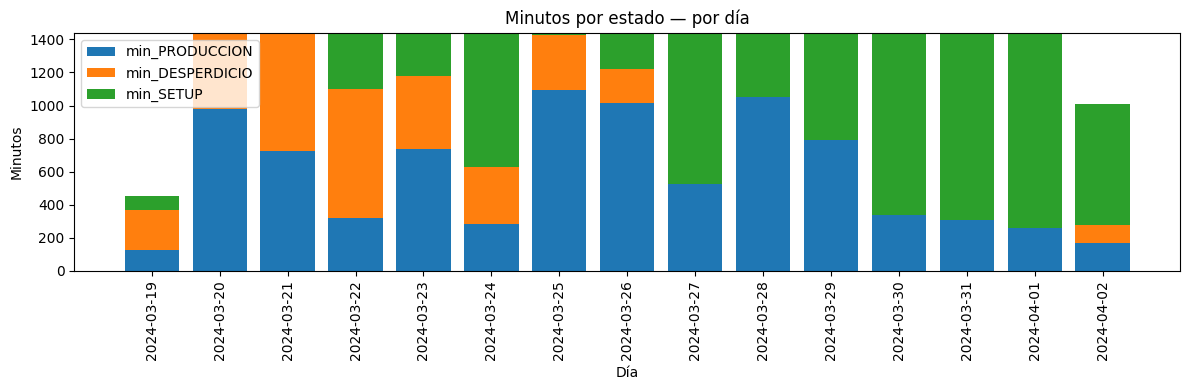

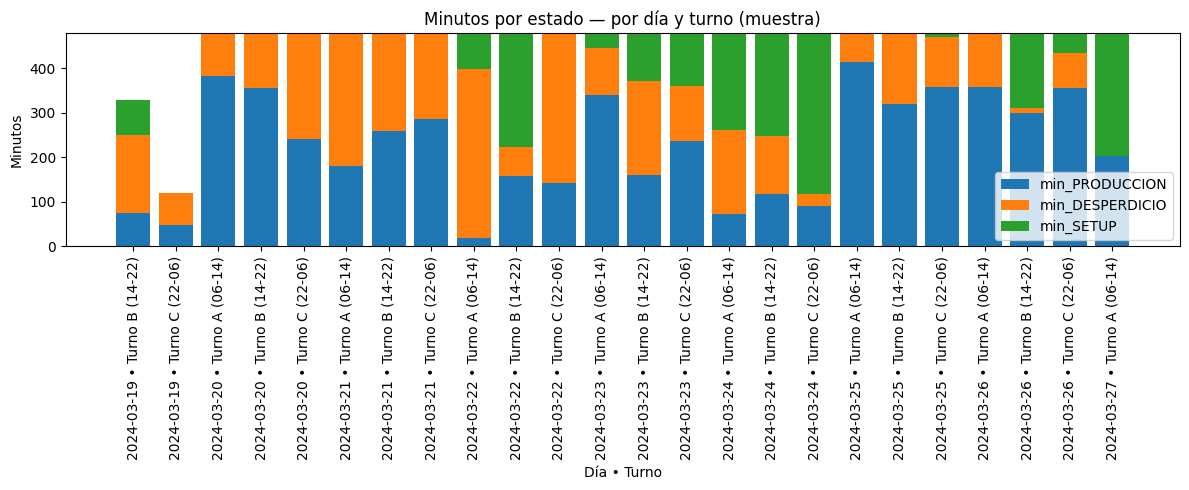

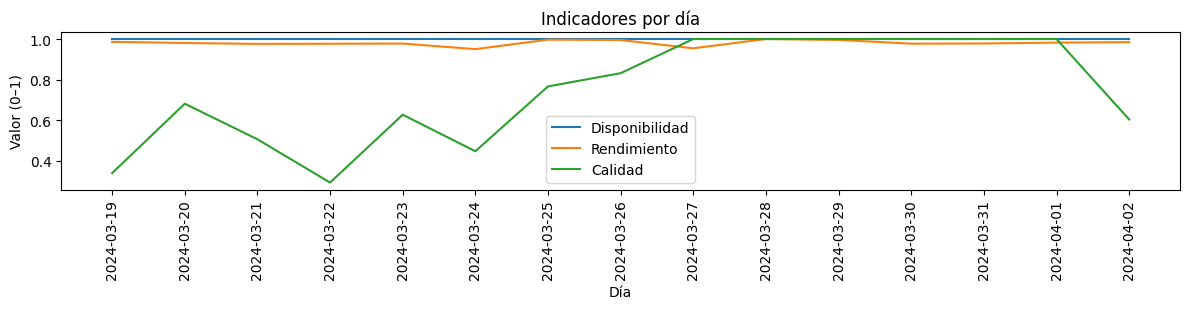

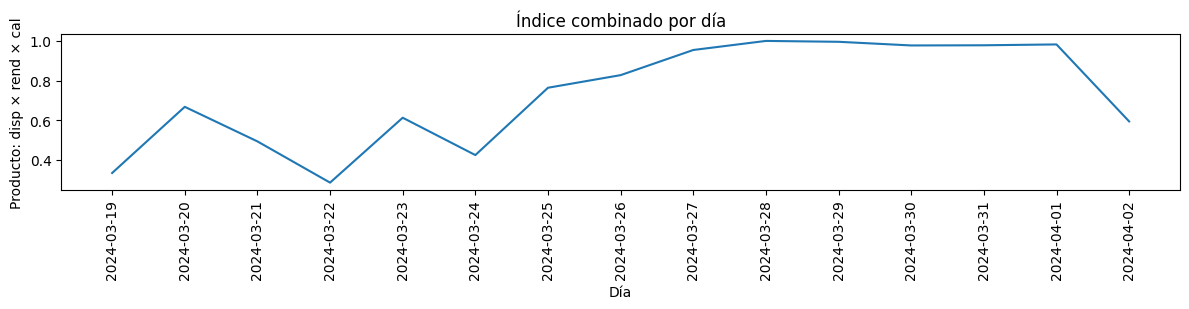


✅ BLOQUE 3A listo.


In [13]:
# =========================================
# BLOQUE 3A — Reparaciones (sin warnings) + ejes legibles
# Requisitos: timeline (con 'estado', 'hal_speed_mean_5m', 'hal_speed_std_5m'), df_1min, TS_COL
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --------- 0) Reconstrucción segura de métricas por minuto (si no existen) ---------
need_cols = {"estado", "hal_speed_mean_5m", "hal_speed_std_5m"}
if 'timeline' not in globals() or not need_cols.issubset(set(timeline.columns)):
    raise RuntimeError("Faltan 'timeline' o columnas básicas del Bloque 2B.")

# Recalcula velocidad nominal de forma robusta (evita avisos y divisiones por cero)
prod_mask = timeline["estado"].eq("PRODUCCION")
std_series = timeline["hal_speed_std_5m"].dropna()
var_p25 = std_series.quantile(0.25) if len(std_series)>0 else np.nan

if np.isnan(var_p25):
    base_for_nominal = timeline["hal_speed_mean_5m"].dropna()
else:
    base_for_nominal = timeline.loc[
        prod_mask & (timeline["hal_speed_std_5m"] <= var_p25),
        "hal_speed_mean_5m"
    ].dropna()

if len(base_for_nominal) == 0:
    base_for_nominal = timeline.loc[timeline["hal_speed_mean_5m"] > 0, "hal_speed_mean_5m"].dropna()
if len(base_for_nominal) == 0:
    raise RuntimeError("No hay datos de velocidad suficientes para estimar un valor nominal.")

velocidad_nominal = float(base_for_nominal.quantile(0.90))
if velocidad_nominal <= 0:
    positives = timeline.loc[timeline["hal_speed_mean_5m"] > 0, "hal_speed_mean_5m"]
    velocidad_nominal = float(max(positives.mean(), 1e-6))

# Crea 'out' con métricas por minuto
out = timeline.copy()
out["disp_min"] = (~out["estado"].eq("PARO")).astype("float64")
out["rend_min"] = (out["hal_speed_mean_5m"] / velocidad_nominal).clip(lower=0, upper=1)
out["activo_min"] = out["estado"].isin(["PRODUCCION", "DESPERDICIO"]).astype("float64")
out["calidad_bueno_min"] = (out["estado"].eq("PRODUCCION")).astype("float64")

# --------- 1) Turnos parametrizables (fácil de cambiar) ---------
# Define aquí tus turnos (pares [hora_inicio, hora_fin] en formato 24h, fin exclusivo).
# Nota: si un turno cruza medianoche, colócalo con el fin más pequeño (ej. 22–06).
TURNOS = [
    ("Turno A (06-14)", 6, 14),
    ("Turno B (14-22)", 14, 22),
    ("Turno C (22-06)", 22, 6)
]

def asignar_turno(ts):
    h = ts.hour
    for nombre, h_ini, h_fin in TURNOS:
        if h_ini < h_fin:
            if h_ini <= h < h_fin:
                return nombre
        else:
            # Cruza medianoche
            if h >= h_ini or h < h_fin:
                return nombre
    return "Turno (?)"

out["fecha"] = out.index.date
out["turno"] = [asignar_turno(ts) for ts in out.index]

# --------- 2) Agregados SIN apply() para evitar avisos ---------
# Por día: medias y sumas
agg_day = out.groupby("fecha", sort=True).agg(
    disp=("disp_min", "mean"),
    rend=("rend_min", "mean"),
    buenos=("calidad_bueno_min", "sum"),
    activos=("activo_min", "sum")
)

# Calidad diaria (buenos / activos)
agg_day["calidad"] = np.where(agg_day["activos"]>0, agg_day["buenos"]/agg_day["activos"], np.nan)
agg_day.rename(columns={"disp":"disponibilidad", "rend":"rendimiento"}, inplace=True)

# Minutos por estado (crosstab)
min_por_estado_day = pd.crosstab(out["fecha"], out["estado"]).reindex(agg_day.index, fill_value=0)

por_dia = pd.concat([agg_day, min_por_estado_day], axis=1).reset_index()

print("=== Indicadores por DÍA (primeras filas) ===")
display(por_dia.head())

# Por día y turno
agg_dt = out.groupby(["fecha", "turno"], sort=True).agg(
    disp=("disp_min", "mean"),
    rend=("rend_min", "mean"),
    buenos=("calidad_bueno_min", "sum"),
    activos=("activo_min", "sum")
)
agg_dt["calidad"] = np.where(agg_dt["activos"]>0, agg_dt["buenos"]/agg_dt["activos"], np.nan)
agg_dt.rename(columns={"disp":"disponibilidad", "rend":"rendimiento"}, inplace=True)

min_por_estado_dt = pd.crosstab([out["fecha"], out["turno"]], out["estado"]).reindex(agg_dt.index, fill_value=0)

por_dia_turno = pd.concat([agg_dt, min_por_estado_dt], axis=1).reset_index()

print("\n=== Indicadores por DÍA y TURNO (primeras filas) ===")
display(por_dia_turno.head())

# --------- 3) Gráficas con ejes legibles (fechas rotadas) ---------
ROT = 90  # rotación de las etiquetas del eje X

# (a) Minutos por estado — por día
est_cols = [c for c in ["PARO","PRODUCCION","DESPERDICIO","SETUP"] if c in por_dia.columns]
x = por_dia["fecha"].astype(str).to_list()
plt.figure(figsize=(12, 4))
bottom = np.zeros(len(por_dia))
for col in est_cols:
    vals = por_dia[col].to_numpy()
    plt.bar(x, vals, bottom=bottom, label=f"min_{col}")
    bottom = bottom + vals
plt.title("Minutos por estado — por día")
plt.xlabel("Día"); plt.ylabel("Minutos")
plt.xticks(rotation=ROT)
plt.legend()
plt.tight_layout(); plt.show()

# (b) Minutos por estado — por día y turno (muestra hasta 24 barras)
subset = por_dia_turno.head(24).copy()
x2 = (subset["fecha"].astype(str) + " • " + subset["turno"]).to_list()
plt.figure(figsize=(12, 5))
bottom = np.zeros(len(subset))
for col in est_cols:
    vals = subset[col].to_numpy()
    plt.bar(x2, vals, bottom=bottom, label=f"min_{col}")
    bottom = bottom + vals
plt.title("Minutos por estado — por día y turno (muestra)")
plt.xlabel("Día • Turno"); plt.ylabel("Minutos")
plt.xticks(rotation=ROT)
plt.legend()
plt.tight_layout(); plt.show()

# (c) Indicadores por día
plt.figure(figsize=(12, 3.2))
plt.plot(por_dia["fecha"].astype(str), por_dia["disponibilidad"], label="Disponibilidad")
plt.plot(por_dia["fecha"].astype(str), por_dia["rendimiento"],   label="Rendimiento")
plt.plot(por_dia["fecha"].astype(str), por_dia["calidad"],       label="Calidad")
plt.title("Indicadores por día")
plt.xlabel("Día"); plt.ylabel("Valor (0–1)"); plt.xticks(rotation=ROT)
plt.legend(); plt.tight_layout(); plt.show()

# (d) Índice combinado por día (producto simple)
por_dia["indice_combinado"] = por_dia["disponibilidad"] * por_dia["rendimiento"] * por_dia["calidad"]
plt.figure(figsize=(12, 3.2))
plt.plot(por_dia["fecha"].astype(str), por_dia["indice_combinado"])
plt.title("Índice combinado por día")
plt.xlabel("Día"); plt.ylabel("Producto: disp × rend × cal"); plt.xticks(rotation=ROT)
plt.tight_layout(); plt.show()

print("\n✅ BLOQUE 3A listo.")


## **3.2. Cálculos de desperdicio**

In [14]:
# =========================================
# BLOQUE 3B — Ajuste estricto de “DESPERDICIO” + evidencia
# Requisitos: timeline (features 5 min) y 'out' creado en 3A
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

if 'timeline' not in globals() or 'out' not in globals():
    raise RuntimeError("Ejecuta primero los Bloques 2B y 3A.")

# Recalcula umbrales a partir de las features (5 min)
def _q(s, p, fallback=np.nan):
    s = s.dropna()
    return float(s.quantile(p)) if len(s) else fallback

speed_active_thresh = _q(timeline["hal_speed_mean_5m"][timeline["hal_speed_mean_5m"]>0], 0.10, 0.0)
hal_var_hi = _q(timeline["hal_speed_std_5m"], 0.80)  # más estricto (p80)
rpm_var_hi = _q(timeline["rpm_var_t_5m"],    0.80) if "rpm_var_t_5m" in timeline else np.nan
dev_hi     = _q(timeline["cbz_dev_mean_5m"], 0.80) if "cbz_dev_mean_5m" in timeline else np.nan
pres_med   = _q(timeline["pres_level_mean_5m"], 0.50) if "pres_level_mean_5m" in timeline else np.nan
pres_high_th = np.nanmax([300.0, pres_med]) if not np.isnan(pres_med) else np.nan

# Condiciones base para DESPERDICIO_ESTRICTO
is_active = timeline["hal_speed_mean_5m"] >= speed_active_thresh
c_hal_instab = timeline["hal_speed_std_5m"] >= hal_var_hi
c_rpm_instab = timeline["rpm_var_t_5m"]    >= rpm_var_hi if "rpm_var_t_5m" in timeline else pd.Series(False, index=timeline.index)
c_dev_alta   = timeline["cbz_dev_mean_5m"] >= dev_hi     if "cbz_dev_mean_5m" in timeline else pd.Series(False, index=timeline.index)
c_pres_alta  = timeline["pres_level_mean_5m"] >= pres_high_th if "pres_level_mean_5m" in timeline and not np.isnan(pres_high_th) else pd.Series(True, index=timeline.index)

# Reglas: activo Y (inestabilidad en haladores O rpm O desviación alta) Y presión alta (si existe)
desp_strict_mask = (is_active & (c_hal_instab | c_rpm_instab | c_dev_alta) & c_pres_alta)

# Evidencias (conteos)
evid = pd.DataFrame({
    "is_active": is_active.sum(),
    "hal_instab": c_hal_instab.sum(),
    "rpm_instab": c_rpm_instab.sum() if isinstance(c_rpm_instab, pd.Series) else 0,
    "dev_alta": c_dev_alta.sum() if isinstance(c_dev_alta, pd.Series) else 0,
    "pres_alta": c_pres_alta.sum(),
    "desp_strict": desp_strict_mask.sum()
}, index=["conteo"]).T

print("=== Evidencias por condición (conteo de minutos que cumplen) ===")
display(evid)

# Nuevo estado (solo ajusta DESPERDICIO→SETUP cuando no cumple el estricto)
estado_v2 = out["estado"].copy()
fix_idx = (out["estado"].eq("DESPERDICIO") & (~desp_strict_mask))
estado_v2.loc[fix_idx] = "SETUP"

print("\nMinutos ajustados de DESPERDICIO→SETUP:", int(fix_idx.sum()))
dist_v1 = out["estado"].value_counts().rename("original")
dist_v2 = estado_v2.value_counts().rename("ajustado")
dist_cmp = pd.concat([dist_v1, dist_v2], axis=1).fillna(0).astype(int)
print("\n=== Comparación de distribución de estados (original vs ajustado) ===")
display(dist_cmp)

# Si quieres usar el estado ajustado en los indicadores, sobreescribe en 'out':
# out["estado"] = estado_v2
# (y vuelve a correr el bloque 3A para ver cómo cambian los agregados)
print("\n✅ BLOQUE 3B listo. Puedes activar el ajuste sobrescribiendo out['estado']=estado_v2.")


=== Evidencias por condición (conteo de minutos que cumplen) ===


,conteo
is_active,18436
hal_instab,20179
rpm_instab,20179
dev_alta,4039
pres_alta,10090
desp_strict,8452



Minutos ajustados de DESPERDICIO→SETUP: 0

=== Comparación de distribución de estados (original vs ajustado) ===


,original,ajustado
estado,,
PRODUCCION,8716,8716
SETUP,7828,7828
DESPERDICIO,3637,3637



✅ BLOQUE 3B listo. Puedes activar el ajuste sobrescribiendo out['estado']=estado_v2.


## **3.3. Clustering (aprendizaje automático) y mapeo a estados**

Aquí aplicamos aprendizaje automático: agrupamos automáticamente los minutos en cuatro clústeres usando K-Means sobre las características en ventana. Luego, mapeamos cada clúster al estado (PARO/PRODUCCION/DESPERDICIO/SETUP) por mayoría respecto a las etiquetas por reglas (originales o ajustadas). Se incluye una proyección PCA para visualizar.

Clustering seleccionado: k=2 | silhouette aprox.: 0.859107490166992

=== Tamaño de cada clúster ===


,conteo
0,20037
1,141



=== Medianas de características por clúster ===


,hal_speed_mean_5m,hal_speed_std_5m,rpm_level_mean_5m,rpm_var_t_5m,rpm_absdiff_5m,pres_level_mean_5m,pres_var_t_5m,cbz_dev_mean_5m,cbz_dev_std_5m
cluster,,,,,,,,,
0,62.30,0.0,26.20,0.000000,0.00,3707.12,6.895506,1.143333,0.095307
1,62.05,0.0,17.32,9.928142,4.76,2512.72,1154.076748,1.213333,0.089830



=== Tabla clúster vs. estado (reglas) ===


estado,DESPERDICIO,PRODUCCION,SETUP
cluster,,,
0,3633,8716,7688
1,4,0,137



=== Matriz de confusión (regla vs clúster-mapeado) ===


estado_cluster,PRODUCCION,SETUP
estado_regla,,
DESPERDICIO,3633,4
PRODUCCION,8716,0
SETUP,7688,137


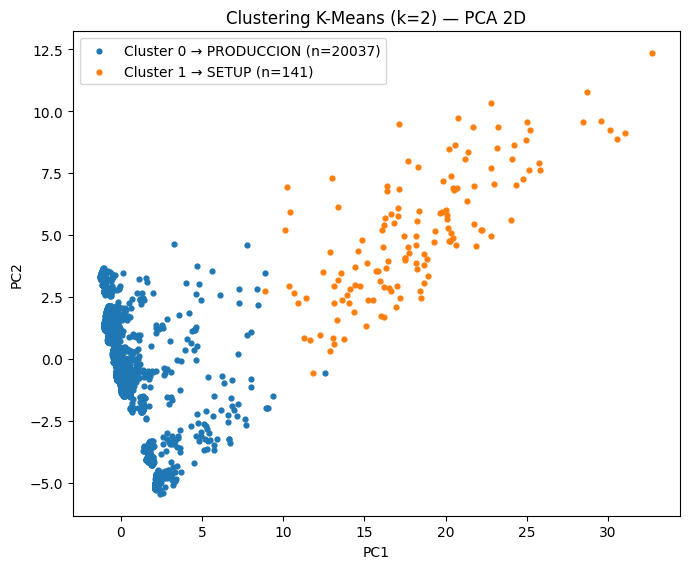


✅ BLOQUE 3C actualizado: clustering robusto con leyenda y sin warnings.


In [16]:
# =========================================
# BLOQUE 3C — Clustering robusto (K-Means) + PCA + leyenda
# Requisitos: 'features' (ventanas 5 min), 'out' (con columna 'estado'), 'timeline'
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 0) Validaciones y selección de columnas numéricas ---
if 'features' not in globals() or 'out' not in globals():
    raise RuntimeError("Faltan 'features' u 'out'. Ejecuta Bloques 2B y 3A.")

candidate_cols = [
    "hal_speed_mean_5m","hal_speed_std_5m",
    "rpm_level_mean_5m","rpm_var_t_5m","rpm_absdiff_5m",
    "pres_level_mean_5m","pres_var_t_5m",
    "cbz_dev_mean_5m","cbz_dev_std_5m"
]
use_cols = [c for c in candidate_cols if c in features.columns]
if len(use_cols) < 2:
    raise RuntimeError("No hay suficientes características para clustering (se requieren ≥2).")

X = features[use_cols].select_dtypes(include=[np.number]).copy()

# Quitamos filas con NaN para clustering
mask_rows = X.dropna().index
X = X.loc[mask_rows]
y_rule = out.loc[mask_rows, "estado"]  # etiquetas por reglas (o ajustadas si aplicaste 3B)

n_samples = len(X)
if n_samples < 2:
    print("⚠️ Muy pocos datos completos para clústeres. Se omite clustering.")
    # Aún así, mostramos algo para no romper el pipeline:
    display(pd.DataFrame({"filas_completas_para_clustering":[n_samples]}))
else:
    # --- 1) Escalado ---
    scaler = StandardScaler()
    Xscaled = scaler.fit_transform(X)

    # --- 2) Selección robusta de k ---
    # Prueba k=4,3,2 (en ese orden). Rechaza k>n_samples. Elige el de mejor silhouette si se puede calcular.
    k_candidates = [4, 3, 2]
    k_candidates = [k for k in k_candidates if k <= n_samples]
    best_k, best_sil, best_labels, best_model = None, -np.inf, None, None

    for k in k_candidates:
        # KMeans estable; fija n_init para evitar avisos
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels_k = km.fit_predict(Xscaled)

        # Silhouette requiere al menos 2 clústeres distintos y n_samples > n_clusters
        sil = np.nan
        if len(np.unique(labels_k)) > 1 and n_samples > k:
            try:
                sil = silhouette_score(Xscaled, labels_k)
            except Exception:
                sil = np.nan

        # Si no se puede calcular silhouette, aún aceptamos el primer k válido
        score = sil if not np.isnan(sil) else -0.5  # preferimos algo calculado
        if score > best_sil:
            best_k, best_sil, best_labels, best_model = k, score, labels_k, km

    if best_labels is None:
        # Fallback: si por alguna razón ninguno pasó, fuerza k=2 (cuando n_samples >=2)
        k = min(2, n_samples)
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        best_labels = km.fit_predict(Xscaled)
        best_k, best_model, best_sil = k, km, np.nan

    print(f"Clustering seleccionado: k={best_k} | silhouette aprox.: {None if np.isinf(best_sil) else best_sil}")

    labels_km = best_labels

    # --- 3) Proyección PCA 2D (si hay suficientes filas) ---
    can_pca = n_samples >= 2
    if can_pca:
        pca = PCA(n_components=2, random_state=42)
        X2 = pca.fit_transform(Xscaled)
    else:
        X2 = None

    # --- 4) Tamaños y medianas por clúster ---
    cluster_counts = pd.Series(labels_km).value_counts().sort_index()
    print("\n=== Tamaño de cada clúster ===")
    display(cluster_counts.rename("conteo").to_frame())

    cluster_medians = pd.DataFrame(X, columns=use_cols).assign(cluster=labels_km).groupby("cluster").median()
    print("\n=== Medianas de características por clúster ===")
    display(cluster_medians)

    # --- 5) Mapeo clúster → estado por mayoría contra las reglas ---
    ct = pd.crosstab(pd.Series(labels_km, index=X.index, name="cluster"), y_rule, dropna=False)
    print("\n=== Tabla clúster vs. estado (reglas) ===")
    display(ct)

    mapping = ct.idxmax(axis=1).to_dict()  # cluster -> estado mayoritario
    mapped_state = pd.Series(labels_km, index=X.index).map(mapping).rename("estado_cluster")

    # Matriz de confusión (regla vs clúster-mapeado)
    conf = pd.crosstab(y_rule, mapped_state, rownames=["estado_regla"], colnames=["estado_cluster"])
    print("\n=== Matriz de confusión (regla vs clúster-mapeado) ===")
    display(conf)

    # --- 6) Gráfica PCA con leyenda (cada clúster por separado) ---
    if can_pca:
        plt.figure(figsize=(7.0, 5.8))
        for cl in sorted(np.unique(labels_km)):
            m = (labels_km == cl)
            etiqueta = f"Cluster {cl} → {mapping.get(cl, '—')} (n={int(m.sum())})"
            plt.scatter(X2[m, 0], X2[m, 1], s=12, label=etiqueta)
        plt.title(f"Clustering K-Means (k={best_k}) — PCA 2D")
        plt.xlabel("PC1"); plt.ylabel("PC2")
        plt.legend(loc="best", frameon=True)
        plt.tight_layout()
        plt.show()

    # --- 7) Adjuntar al timeline (opcional, sin sobrescribir tus columnas) ---
    timeline_cluster = timeline.copy()
    timeline_cluster.loc[mapped_state.index, "estado_cluster"] = mapped_state

    print("\n✅ BLOQUE 3C actualizado: clustering robusto con leyenda y sin warnings.")
    # Persistir si quieres:
    # ct.to_csv("cluster_vs_estado_regla.csv")
    # conf.to_csv("confusion_regla_vs_cluster.csv")
    # cluster_medians.to_csv("cluster_medianas.csv")
